In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Classic FDR

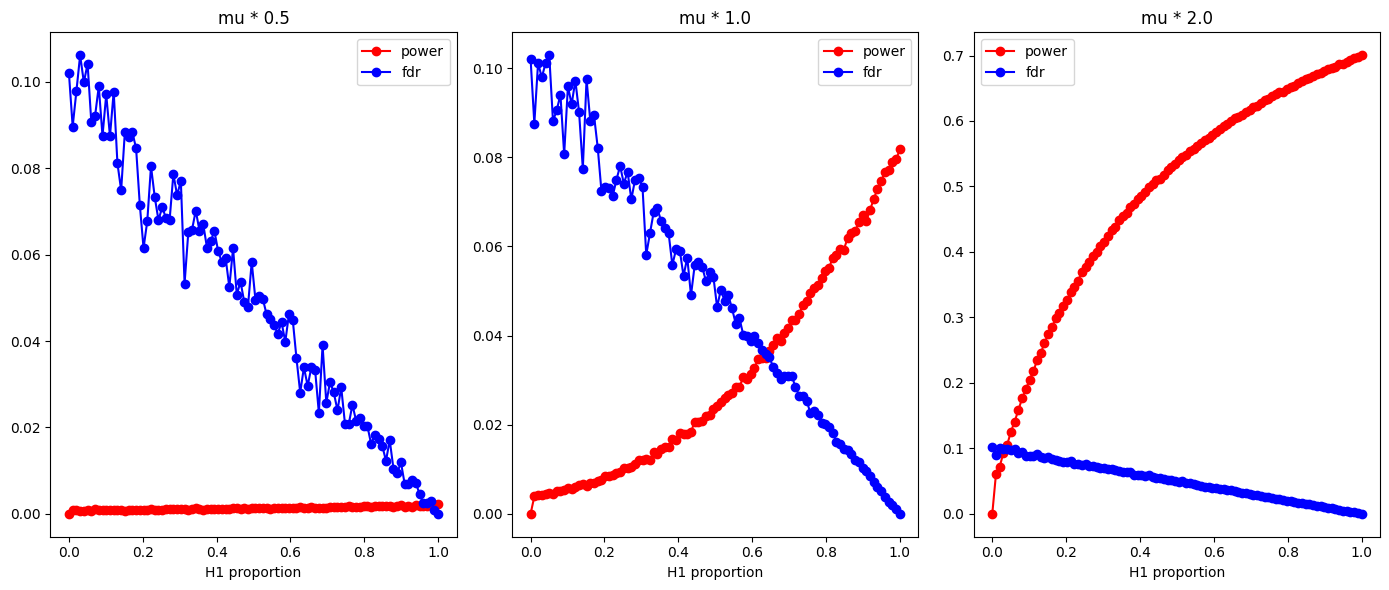

In [2]:
from utils import benjamini_hochberg

def simulate_simple(n=1000, h1_prop=0.5, scale=1.0):
    h = np.random.binomial(1, h1_prop, size=n) * scale
    x = np.random.normal(h, 1, size=n)
    p_values = 1 - scipy.stats.norm.cdf(x)
    rejected = benjamini_hochberg(p_values, q=0.1)
    return h > 0, rejected

def show_stats_for_simple(axis, scale=1.0):
    h1_props = np.linspace(0, 1, 100)
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    for h1_prop in h1_props:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_simple(h1_prop=h1_prop, scale=scale)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    axis.plot(h1_props, result['power'], label='power', color='red', marker='o')
    axis.plot(h1_props, result['fdr'], label='fdr', color='blue', marker='o')
    axis.set_xlabel('H1 proportion')
    axis.title.set_text(f'mu * {scale}')
    axis.legend(loc='best')

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
show_stats_for_simple(axis=axes[0], scale=0.5)
show_stats_for_simple(axis=axes[1], scale=1.0)
show_stats_for_simple(axis=axes[2], scale=2.0)
plt.tight_layout()
plt.show()

### Random hypotheses

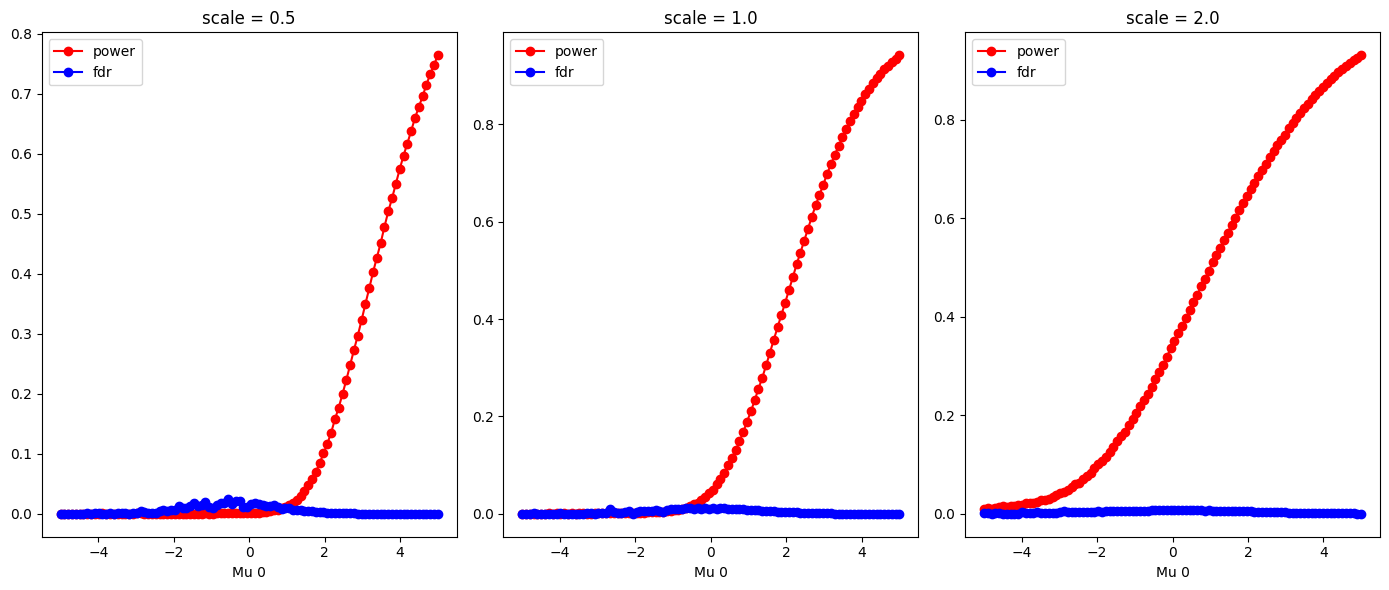

In [6]:
def simulate_random_hyp(n=1000, mu=0.0, scale=1.0):
    x = np.random.normal(mu, scale, size=n)
    y = np.random.normal(x, 1, size=n)
    sigma_n_sq = scale**2/(1+scale**2)
    p_values = 1 - scipy.stats.norm.cdf(x, loc=sigma_n_sq*mu/scale**2, scale=sigma_n_sq**0.5)
    rejected = benjamini_hochberg(p_values, q=0.1)
    return y > 0, rejected

def show_stats_for_random_hyp(axis, scale=1.0):
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    locs = np.linspace(-5.0, 5.0, 100)
    for loc in locs:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_random_hyp(mu=loc, scale=scale)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    axis.plot(locs, result['power'], label='power', color='red', marker='o')
    axis.plot(locs, result['fdr'], label='fdr', color='blue', marker='o')
    axis.set_xlabel('Mu 0')
    axis.title.set_text(f'scale = {scale}')
    axis.legend(loc='best')

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
show_stats_for_random_hyp(axis=axes[0], scale=0.5)
show_stats_for_random_hyp(axis=axes[1], scale=1.0)
show_stats_for_random_hyp(axis=axes[2], scale=2.0)
plt.tight_layout()
plt.show()

### Conformal FDR

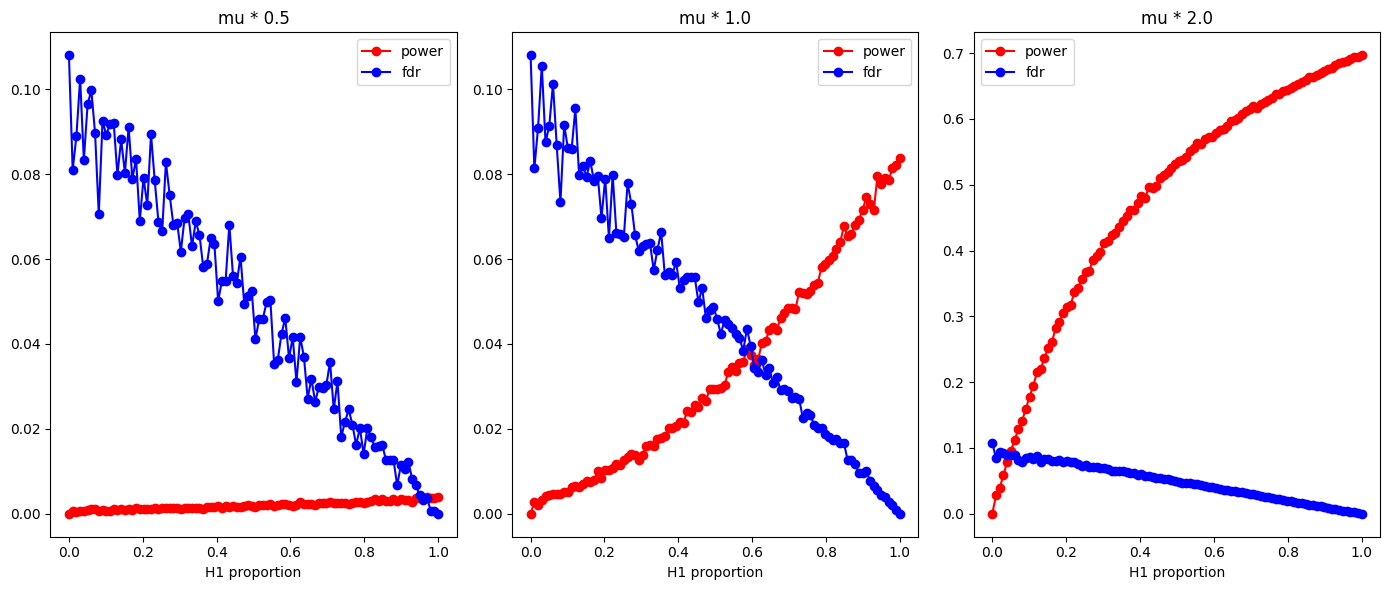

In [4]:
from conformal_bh.utils import conformal_p_values

def simulate_conformal(n=1000, h1_prop=0.5, scale=1.0):
    h = np.random.binomial(1, h1_prop, size=n*2) * scale
    x = np.random.normal(h, 1, size=n*2)
    p_values = conformal_p_values(h[:n] - x[:n], -x[n:])
    rejected = benjamini_hochberg(p_values, q=0.1)
    return h[n:] > 0, rejected

def show_stats_for_conformal(axis, scale=1.0):
    h1_props = np.linspace(0, 1, 100)
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    for h1_prop in h1_props:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_conformal(h1_prop=h1_prop, scale=scale)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    axis.plot(h1_props, result['power'], label='power', color='red', marker='o')
    axis.plot(h1_props, result['fdr'], label='fdr', color='blue', marker='o')
    axis.set_xlabel('H1 proportion')
    axis.title.set_text(f'mu * {scale}')
    axis.legend(loc='best')

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
show_stats_for_conformal(axis=axes[0], scale=0.5)
show_stats_for_conformal(axis=axes[1], scale=1.0)
show_stats_for_conformal(axis=axes[2], scale=2.0)
plt.tight_layout()
plt.show()

### Conformal random hypotheses

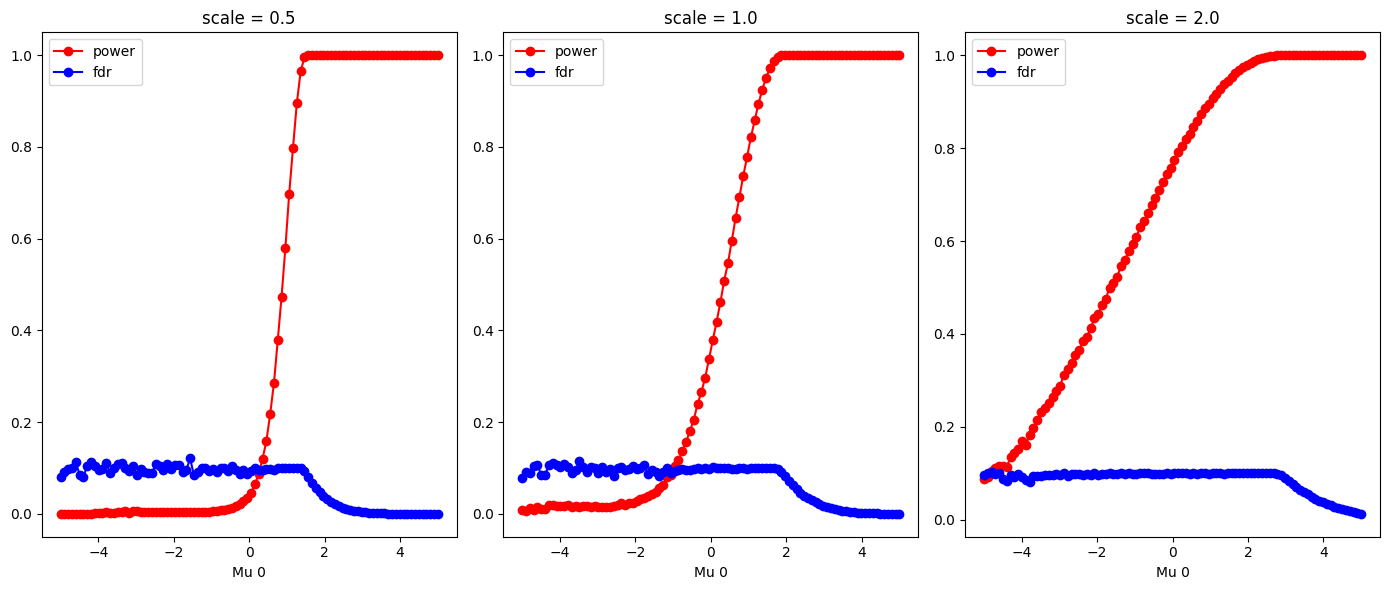

In [8]:
def simulate_conformal_random_hyp(n=1000, mu=0.0, scale=1.0):
    x = np.random.normal(mu, scale, size=n*2)
    y = np.random.normal(x, 1, size=n*2)
    p_values = conformal_p_values(1000 * (y[:n] > 0) - x[:n], -x[n:])
    rejected = benjamini_hochberg(p_values, q=0.1)
    return y[n:] > 0, rejected

def show_stats_for_conformal_random_hyp(axis, scale=1.0):
    np.random.seed(42)
    result = {'power': [], 'fdr': []}
    locs = np.linspace(-5.0, 5.0, 100)
    for loc in locs:
        power = []
        fdr = []
        for _ in range(1000):
            alt_true, rejected = simulate_conformal_random_hyp(mu=loc, scale=scale)
            power.append((rejected & alt_true).sum() / max(1, alt_true.sum()))
            fdr.append((rejected & ~alt_true).sum() / max(1, rejected.sum()))
        
        result['power'].append(np.mean(power))
        result['fdr'].append(np.mean(fdr))
    
    axis.plot(locs, result['power'], label='power', color='red', marker='o')
    axis.plot(locs, result['fdr'], label='fdr', color='blue', marker='o')
    axis.set_xlabel('Mu 0')
    axis.title.set_text(f'scale = {scale}')
    axis.legend(loc='best')

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
show_stats_for_conformal_random_hyp(axis=axes[0], scale=0.5)
show_stats_for_conformal_random_hyp(axis=axes[1], scale=1.0)
show_stats_for_conformal_random_hyp(axis=axes[2], scale=2.0)
plt.tight_layout()
plt.show()